<a href="https://colab.research.google.com/github/RaulVF007/MicroplasticosTFG/blob/main/Micropl%C3%A1sticosTFG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Microplásticos

In [1]:
from typing import Tuple, List
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from time import time

In [2]:
def read_image_label(path_to_img: str, path_to_txt: str, normilize: bool = False) -> Tuple[np.array, np.array]:
    
    # read image
    image = cv2.imread(path_to_img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_h, img_w = image.shape[:2]
  
    # read .txt file for this image
    with open(path_to_txt, "r") as f:
        txt_file = f.readlines()[0].split()
        cls_idx = txt_file[0]
        coords = txt_file[1:]
        polygon = np.array([[eval(x), eval(y)] for x, y in zip(coords[0::2], coords[1::2])]) # convert list of coordinates to numpy massive
  
    # Convert normilized coordinates of polygons to coordinates of image
    if normilize:
        polygon[:,0] = polygon[:,0]*img_w
        polygon[:,1] = polygon[:,1]*img_h
    return image, polygon.astype(np.int32)


def show_image_mask(img: np.array, polygon: np.array, alpha: float = 0.7):
    
    # Create zero array for mask
    mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    overlay = img.copy()
    
    # Draw polygon on the image and mask
    cv2.fillPoly(mask, pts=[polygon], color=(255, 255, 255))
    cv2.fillPoly(img, pts=[polygon], color=(255, 0, 0))
    cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0, image)
    
    # Plot image with mask
    fig = plt.figure(figsize=(22,18))
    axes = fig.subplots(nrows=1, ncols=2)
    axes[0].imshow(img)
    axes[1].imshow(mask, cmap="Greys_r")
    axes[0].set_title("Original image with mask")
    axes[1].set_title("Mask")
    
    # cv2.imwrite("/Users/vladislavefremov/Disk/Vlad/Job/Lab/Priroda/Datasets/whale_draft/20_04_crop2_DJI_0202_450.png", mask)
    
    plt.show()

In [3]:
image, polygon = read_image_label(path_to_img="/content/fragment-01-olympus-14-05-2020-esc-01.JPG",
                                 path_to_txt="/content/fragment-01-olympus-14-05-2020-esc-01.txt",
                                 normilize=True)

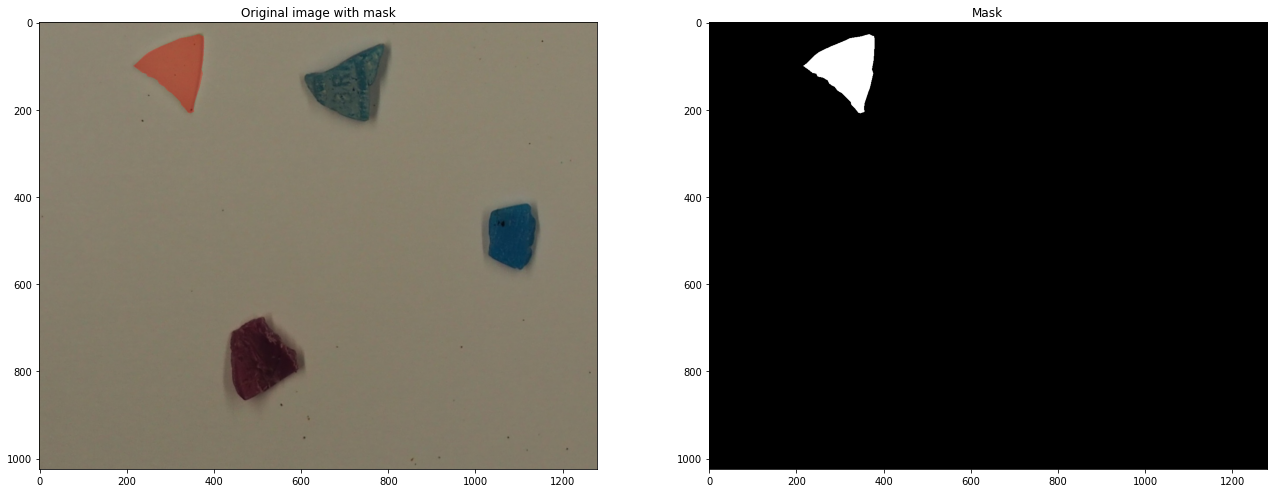

In [4]:
show_image_mask(img=image, polygon=polygon)